### Objective

This Capstone project is of BFSI Domain,and objective of this project is to predict right set of customer for Credit Card Company(CredX) to acquire.This is a classification problem and we have to also make application score card for assigning score to each customer.

In [165]:
#Import libraries to be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [104]:
#from google.colab import files
#uploaded=files.upload()

In [105]:
credit_dt=pd.read_csv('Credit Bureau data.csv')
Demo_dt=pd.read_csv('Demographic data.csv')

In [3]:
#Understanding data 
print(credit_dt.shape)
print(Demo_dt.shape)

(71295, 19)
(71295, 12)


In [4]:
credit_dt.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [5]:
Demo_dt.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


We have two data sets,one providing demographic information about customer(Demo_dt) and other dataset providing previous credit behaviour information about customer(Credit_dt),both have two variables in common,Application Id and Performance Tag(Whether customer defaulted or not)

In [6]:
credit_dt.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [7]:
Demo_dt.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [8]:
#We have to create Master data set by merging credit_dt and demo_dt.
Master_dt=credit_dt.merge(Demo_dt,on='Application ID')

In [9]:
Master_dt.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,...,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_y
0,954457215,0,0,0,0,0,0,4.0,1.0,2,...,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,...,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,...,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,...,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,...,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [10]:
 
Master_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71301 entries, 0 to 71300
Data columns (total 30 columns):
Application ID                                                     71301 non-null int64
No of times 90 DPD or worse in last 6 months                       71301 non-null int64
No of times 60 DPD or worse in last 6 months                       71301 non-null int64
No of times 30 DPD or worse in last 6 months                       71301 non-null int64
No of times 90 DPD or worse in last 12 months                      71301 non-null int64
No of times 60 DPD or worse in last 12 months                      71301 non-null int64
No of times 30 DPD or worse in last 12 months                      71301 non-null int64
Avgas CC Utilization in last 12 months                             70243 non-null float64
No of trades opened in last 6 months                               71300 non-null float64
No of trades opened in last 12 months                              71301 non-null int64
No of P

In [11]:
Master_dt.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

We can see that their are few null values in ,Performance Tag Column,this suggest that these customers do not have any hit in credit bureau,so we will neglect these columns

### EDA on Demographic data

In [12]:
#As per our assignment problem we have to make model based on Demographic data also, so first we are making prediction model based on demographic
#dataset, also in parallel we will be doing EDA(univariate and Bivariate analysis of independent variables)
#EDA and data preparation of Demographic dataset
Demo_dt.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [13]:
Demo_dt.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

In [14]:
Demo_dt.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [15]:
Demo_dt = Demo_dt[pd.notnull(Demo_dt['Performance Tag'])]
Demo_dt.isnull().sum()

Application ID                                   0
Age                                              0
Gender                                           2
Marital Status (at the time of application)      6
No of dependents                                 3
Income                                           0
Education                                      118
Profession                                      13
Type of residence                                8
No of months in current residence                0
No of months in current company                  0
Performance Tag                                  0
dtype: int64

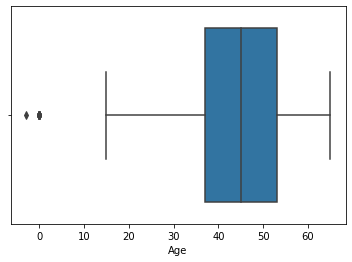

In [16]:
#EDA of Age Column
sns.boxplot(x='Age',data=Demo_dt)
plt.show()

We can see that their are few customers whose age is less than 18 years and negative also(Outliers and incorrect data),since banks seldom provide credit card to people with age less than 18 years we will be replacing these age group with minimum threshold which is 18 years

In [17]:
Demo_dt['Age'][Demo_dt['Age']<=18]=Demo_dt['Age'].mean()

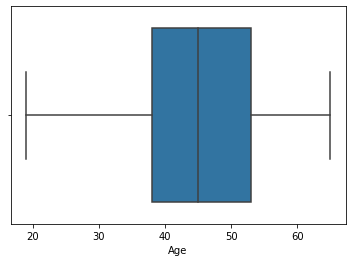

In [18]:
sns.boxplot(x='Age',data=Demo_dt)
plt.show()

In [19]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the performance

bins = np.arange(10,Demo_dt['Age'].max() + 10, 10)
Demo_dt['age_bins'] = pd.cut(Demo_dt['Age'], bins, include_lowest=True)

In [20]:
count_performance = Demo_dt[Demo_dt['Performance Tag']==1].groupby('age_bins')['Performance Tag'].count().reset_index(name = 'count_Performance')

In [21]:
No_of_response = Demo_dt.groupby('age_bins')['Performance Tag'].count().reset_index(name = 'No.of_response')

In [22]:
agg_age = No_of_response.merge(count_performance, on='age_bins')

In [23]:
agg_age['response_performance'] = 100*(agg_age['count_Performance']/agg_age['No.of_response']).round(3)

In [24]:
agg_age

,age_bins,No.of_response,count_Performance,response_performance
0,"(9.999, 20.0]",53,2,3.8
1,"(20.0, 30.0]",5807,238,4.1
2,"(30.0, 40.0]",18690,831,4.4
3,"(40.0, 50.0]",22960,959,4.2
4,"(50.0, 60.0]",17535,718,4.1
5,"(60.0, 70.0]",4825,200,4.1


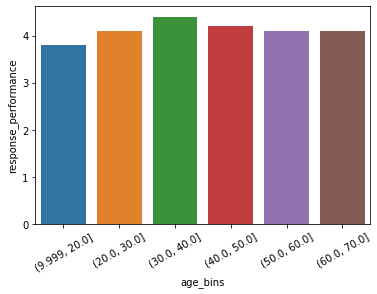

In [25]:
ax = sns.barplot(x='age_bins', y='response_performance', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

We can see that highest default is in age group of 30-40 years,but this information is not very significant

In [26]:
# function to carry out univariate analyis of a categorical variable
def plot_categorical_features(df, variable):
    plt.figure(figsize=(20,15))
    
    plt.subplot(2, 2, 1)
    pie_df = pd.DataFrame(df[variable].value_counts())
    plt.title('Pie Plot for '+variable, fontsize = 15)
    plt.pie(pie_df[variable].values, labels = pie_df.index.values, autopct='%1.2f%%', shadow=False, startangle=30)
    plt.axis('equal')    
   
    count_prospects = df.groupby(variable)['Performance Tag'].sum().reset_index(name = 'count_prospects')
    No_of_prospect = df.groupby(variable)['Performance Tag'].count().reset_index(name = 'No_of_prospects')
    agg_No = count_prospects.merge(No_of_prospect, on = variable)
    agg_No['No_non_prospects'] = agg_No['No_of_prospects'] - agg_No['count_prospects']
    agg_No['Default_rate'] = 100*(agg_No['count_prospects']/agg_No['No_of_prospects']).round(4)     
        
    barWidth = 1
    plt.subplot(2, 2, 2)
    plt.title('Stacked Bar Plot for '+variable, fontsize = 15)
    plt.bar(agg_No.index, list(agg_No['No_non_prospects']), color='#7f6d5f', edgecolor='white', 
            width=barWidth, label='Non-defaulter')
    plt.bar(agg_No.index, list(agg_No['count_prospects']), bottom=list(agg_No['No_non_prospects']), color='#557f2d'
            , edgecolor='white', width=barWidth,label='Defaulter')   

    plt.xticks(agg_No.index, list(agg_No[variable]), fontweight='bold', fontsize = 15, rotation=90)
    plt.xlabel(variable, fontsize = 20)
    for i in agg_No.index:
        plt.text(x = i-0.25, y = agg_No['No_of_prospects'][i], s = agg_No['count_prospects'][i],fontsize=10)
        plt.text(x = i-0.5 , y = 1000, s = agg_No['No_non_prospects'][i],fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)
    
    plt.subplot(2, 2, 3)
    plt.title('Bar Plot for '+ variable, fontsize = 15)
    sns.barplot(x=variable, y='Default_rate', data=agg_No)
    
    plt.xticks(agg_No.index, list(agg_No[variable].astype('category')), fontweight='bold', fontsize = 15, rotation=90)
    plt.xlabel(variable, fontsize = 15)
    
    for i in agg_No.index:
        plt.text(x = i-0.25, y = 0.25, s = ''+str(agg_No['Default_rate'][i].round(3))+' %',fontsize=15)

    plt.show()
    return agg_No  

In [27]:
## EDA for the Age variable
Demo_dt.Gender.describe()

count     69868
unique        2
top           M
freq      53362
Name: Gender, dtype: object

In [28]:
#EDA of Gender column
Demo_dt['Gender'].value_counts()

M    53362
F    16506
Name: Gender, dtype: int64

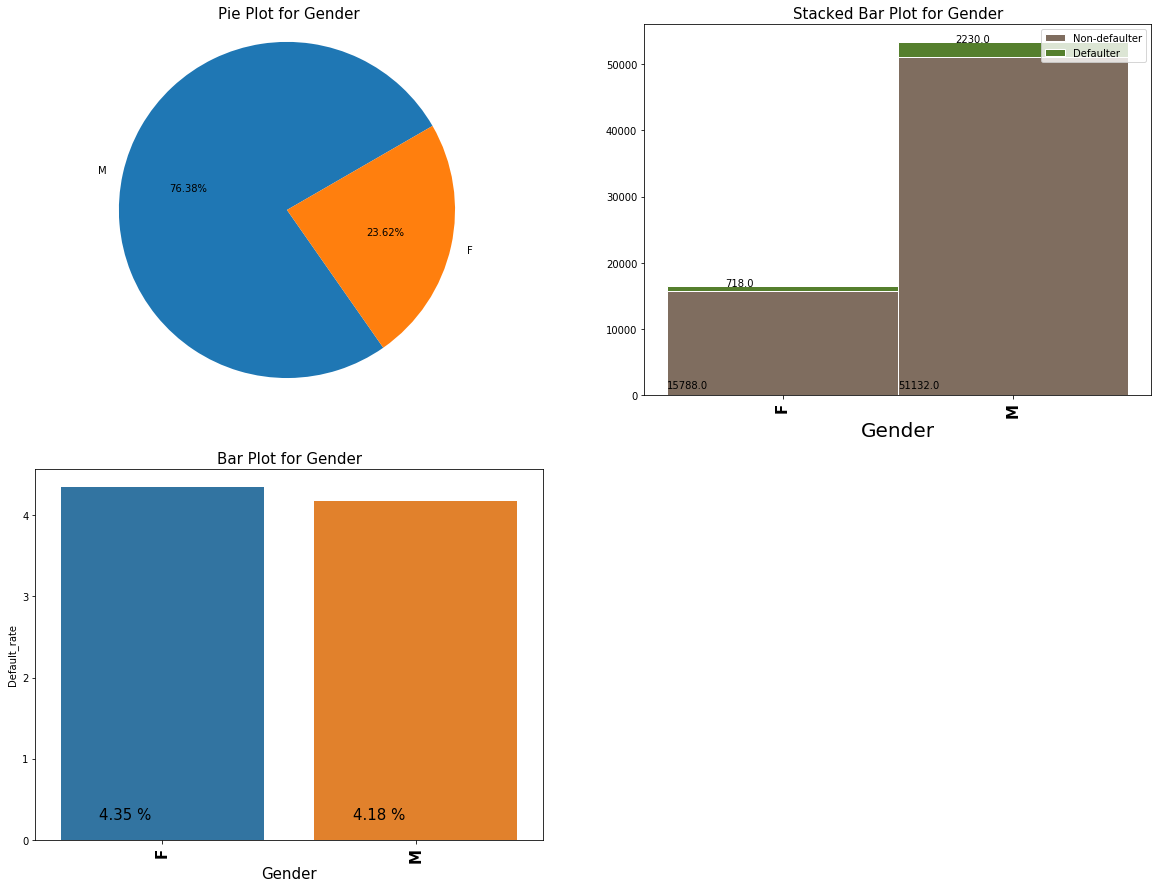

,Gender,count_prospects,No_of_prospects,No_non_prospects,Default_rate
0,F,718.0,16506,15788.0,4.35
1,M,2230.0,53362,51132.0,4.18


In [29]:
plot_categorical_features(Demo_dt,'Gender')

In [30]:
count_gender = Demo_dt.groupby('Gender')['Performance Tag'].sum().reset_index(name = 'count_gender')

In [31]:
No_of_response = Demo_dt.groupby('Gender')['Performance Tag'].count().reset_index(name = 'No_of_response')

In [32]:
agg_Gender = count_gender.merge(No_of_response, on = 'Gender')

In [33]:
agg_Gender['response_performance'] = 100*(agg_Gender['count_gender']/agg_Gender['No_of_response']).round(4)

In [34]:
agg_Gender

,Gender,count_gender,No_of_response,response_performance
0,F,718.0,16506,4.35
1,M,2230.0,53362,4.18


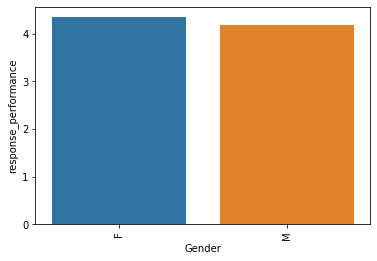

In [35]:
ax = sns.barplot(x='Gender', y='response_performance', data=agg_Gender)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

No conclusive result based on gender

In [36]:
Demo_dt['Marital Status (at the time of application)'].value_counts()

Married    59547
Single     10317
Name: Marital Status (at the time of application), dtype: int64

In [37]:
count_Marital = Demo_dt.groupby('Marital Status (at the time of application)')['Performance Tag'].sum().reset_index(name = 'count_Marital')

In [38]:
No_of_response = Demo_dt.groupby('Marital Status (at the time of application)')['Performance Tag'].count().reset_index(name = 'No_of_response')

In [39]:
agg_marital = count_Marital.merge(No_of_response, on = 'Marital Status (at the time of application)')

In [40]:
agg_marital['response_performance'] = 100*(agg_marital['count_Marital']/agg_marital['No_of_response']).round(4)

In [41]:
agg_marital

,Marital Status (at the time of application),count_Marital,No_of_response,response_performance
0,Married,2503.0,59547,4.20
1,Single,445.0,10317,4.31


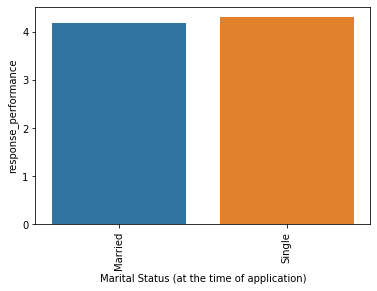

In [42]:
ax = sns.barplot(x='Marital Status (at the time of application)', y='response_performance', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

No conclusive result can be obtained from marital status data

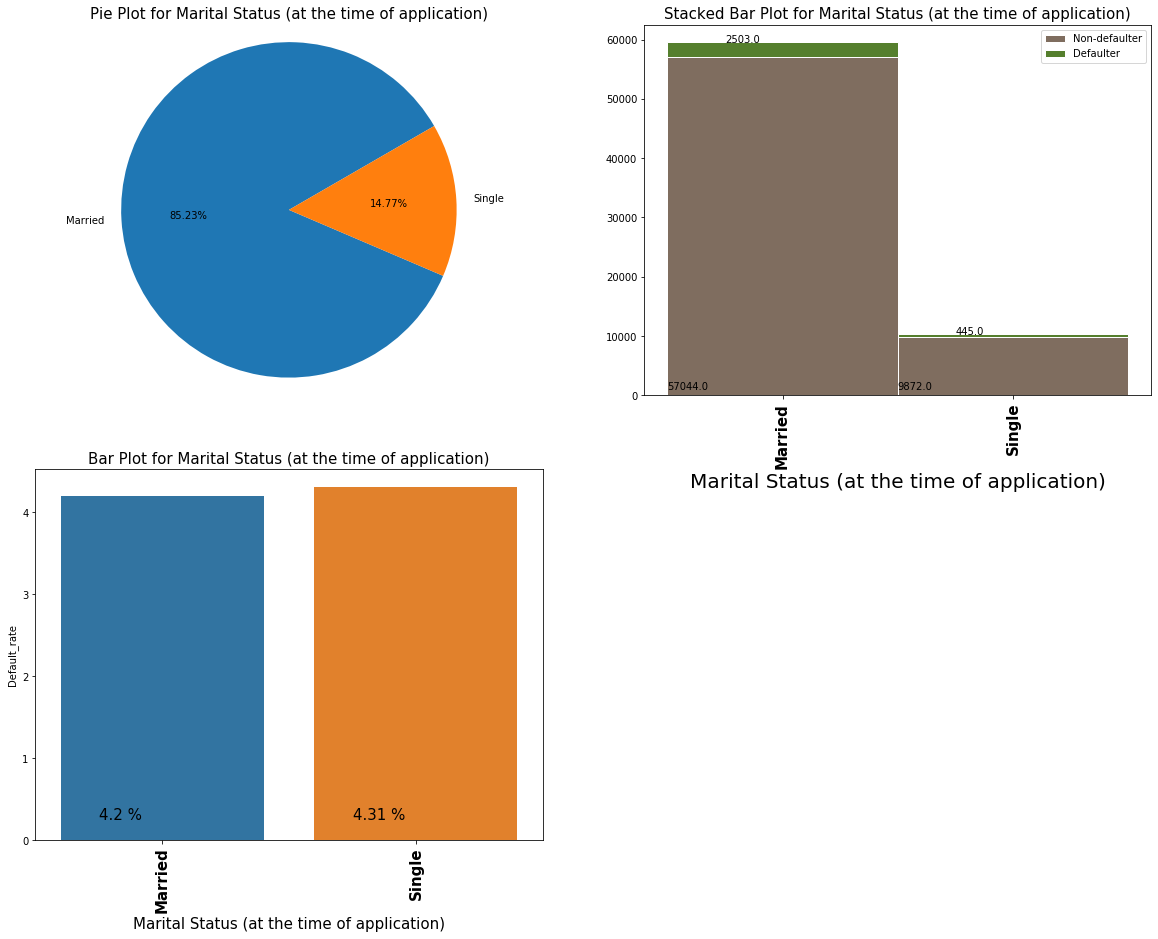

,Marital Status (at the time of application),count_prospects,No_of_prospects,No_non_prospects,Default_rate
0,Married,2503.0,59547,57044.0,4.20
1,Single,445.0,10317,9872.0,4.31


In [43]:
## univariate analysis for Marital_Status
plot_categorical_features(Demo_dt,'Marital Status (at the time of application)')

In [44]:
#EDA of Education

In [45]:
Demo_dt['Education'].value_counts()

Professional    24386
Masters         23481
Bachelor        17302
Phd              4464
Others            119
Name: Education, dtype: int64

In [46]:
count_edu = Demo_dt.groupby('Education')['Performance Tag'].sum().reset_index(name = 'count_edu')

In [47]:
No_of_response = Demo_dt.groupby('Education')['Performance Tag'].count().reset_index(name = 'No_of_response')

In [48]:
agg_edu = count_edu.merge(No_of_response, on = 'Education')

In [49]:
agg_edu['response_performance'] = 100*(agg_edu['count_edu']/agg_edu['No_of_response']).round(4)

In [50]:
agg_edu

,Education,count_edu,No_of_response,response_performance
0,Bachelor,742.0,17302,4.29
1,Masters,998.0,23481,4.25
2,Others,8.0,119,6.72
3,Phd,184.0,4464,4.12
4,Professional,1011.0,24386,4.15


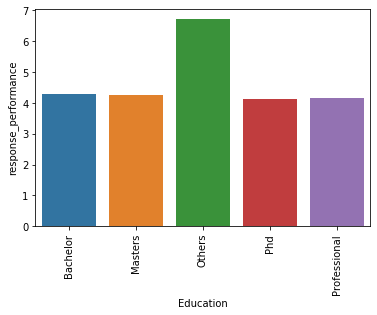

In [51]:
ax = sns.barplot(x='Education', y='response_performance', data=agg_edu)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can see that literate people are less likely to default on their credit card bills

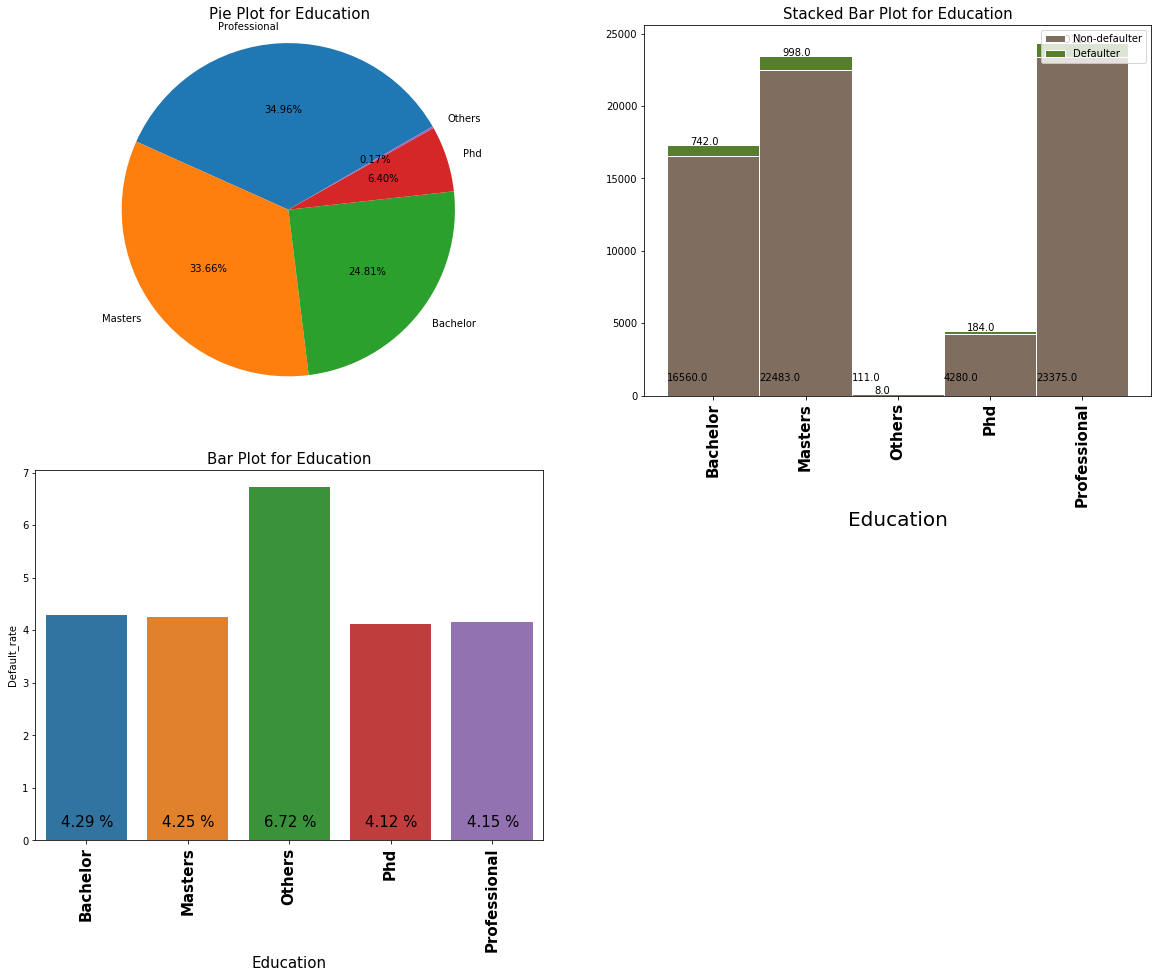

,Education,count_prospects,No_of_prospects,No_non_prospects,Default_rate
0,Bachelor,742.0,17302,16560.0,4.29
1,Masters,998.0,23481,22483.0,4.25
2,Others,8.0,119,111.0,6.72
3,Phd,184.0,4464,4280.0,4.12
4,Professional,1011.0,24386,23375.0,4.15


In [52]:
## Education
plot_categorical_features(Demo_dt,'Education')

In [53]:
#EDA of Profession

In [54]:
Demo_dt['Profession '].value_counts()

SAL        39674
SE_PROF    16256
SE         13927
Name: Profession , dtype: int64

In [55]:
count_profession = Demo_dt.groupby('Profession ')['Performance Tag'].sum().reset_index(name = 'count_profession')

In [56]:
No_of_response = Demo_dt.groupby('Profession ')['Performance Tag'].count().reset_index(name = 'No_of_response')

In [57]:
agg_profession = count_profession.merge(No_of_response, on = 'Profession ')

In [58]:
agg_profession['response_performance'] = 100*(agg_profession['count_profession']/agg_profession['No_of_response']).round(4)

In [59]:
agg_profession

,Profession,count_profession,No_of_response,response_performance
0,SAL,1629.0,39674,4.11
1,SE,642.0,13927,4.61
2,SE_PROF,677.0,16256,4.16


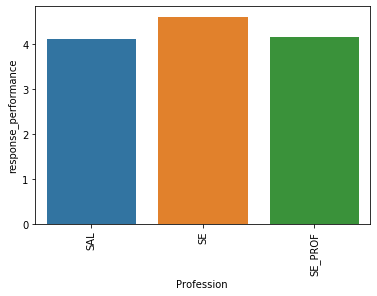

In [60]:
ax = sns.barplot(x='Profession ', y='response_performance', data=agg_profession)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Self Employed people are more likely to default on their credit card

In [61]:
#EDA of Type of residence

In [62]:
Demo_dt['Type of residence'].value_counts()

Rented                 52280
Owned                  14003
Living with Parents     1778
Company provided        1603
Others                   198
Name: Type of residence, dtype: int64

In [63]:
count_res = Demo_dt.groupby('Type of residence')['Performance Tag'].sum().reset_index(name = 'count_res')

In [64]:
No_of_response = Demo_dt.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'No_of_response')

In [65]:
agg_res = count_res.merge(No_of_response, on = 'Type of residence')

In [66]:
agg_res['response_performance'] = 100*(agg_res['count_res']/agg_res['No_of_response']).round(4)

In [67]:
agg_res

,Type of residence,count_res,No_of_response,response_performance
0,Company provided,73.0,1603,4.55
1,Living with Parents,80.0,1778,4.50
2,Others,5.0,198,2.53
3,Owned,593.0,14003,4.23
4,Rented,2197.0,52280,4.20


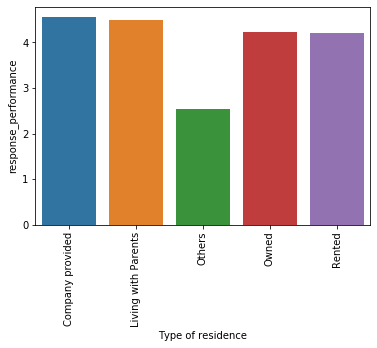

In [68]:
ax = sns.barplot(x='Type of residence', y='response_performance', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

no conclusive result

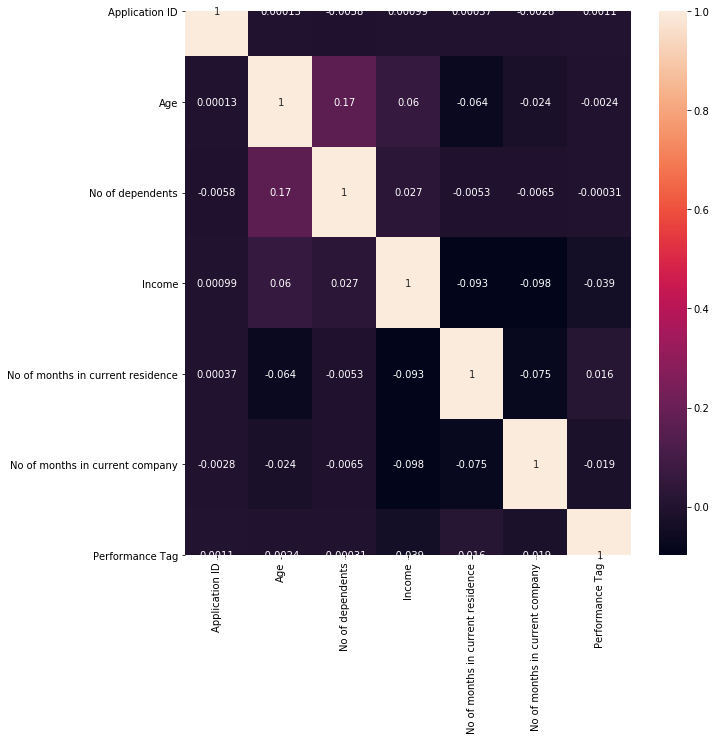

In [69]:
## lets draw heatmap
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(Demo_dt.corr(),annot = True)
plt.show()

### EDA on Credit data

In [70]:
## evaluating the Performance_tag values
credit_dt['Performance Tag'].value_counts()

0.0    66922
1.0     2948
Name: Performance Tag, dtype: int64

In [71]:
## evaluating the percentage of data for defaulters
percent_defaulters = (credit_dt['Performance Tag'].sum()/credit_dt['Performance Tag'].count())*100
percent_defaulters

4.219264348074996

In [72]:
credit_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [73]:
## getting null counts across variables
credit_dt.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [74]:
## EDA for the No of times 90 DPD or worse in last 6 months variable
credit_dt['No of times 90 DPD or worse in last 6 months'].value_counts()

0    54869
1    13874
2     2258
3      294
Name: No of times 90 DPD or worse in last 6 months, dtype: int64

In [75]:
## function to carry out univariate analyis of a categorical variable
def plot_categorical_features(df, variable):
    plt.figure(figsize=(20,15))
    
    plt.subplot(2, 2, 1)
    pie_df = pd.DataFrame(df[variable].value_counts())
    plt.title('Pie Plot for '+variable, fontsize = 15)
    plt.pie(pie_df[variable].values, labels = pie_df.index.values, autopct='%1.2f%%', shadow=False, startangle=30)
    plt.axis('equal')    
   
    count_prospects = df.groupby(variable)['Performance Tag'].sum().reset_index(name = 'count_prospects')
    No_of_prospect = df.groupby(variable)['Performance Tag'].count().reset_index(name = 'No_of_prospects')
    agg_No = count_prospects.merge(No_of_prospect, on = variable)
    agg_No['No_non_prospects'] = agg_No['No_of_prospects'] - agg_No['count_prospects']
    agg_No['Default_rate'] = 100*(agg_No['count_prospects']/agg_No['No_of_prospects']).round(4)     
        
    barWidth = 1
    plt.subplot(2, 2, 2)
    plt.title('Stacked Bar Plot for '+variable, fontsize = 15)
    plt.bar(agg_No.index, list(agg_No['No_non_prospects']), color='#7f6d5f', edgecolor='white', 
            width=barWidth, label='Non-defaulter')
    plt.bar(agg_No.index, list(agg_No['count_prospects']), bottom=list(agg_No['No_non_prospects']), color='#557f2d'
            , edgecolor='white', width=barWidth,label='Defaulter')   

    plt.xticks(agg_No.index, list(agg_No[variable]), fontweight='bold', fontsize = 15, rotation=90)
    plt.xlabel(variable, fontsize = 20)
    for i in agg_No.index:
        plt.text(x = i-0.25, y = agg_No['No_of_prospects'][i], s = agg_No['count_prospects'][i],fontsize=10)
        plt.text(x = i-0.5 , y = 1000, s = agg_No['No_non_prospects'][i],fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)
    
    plt.subplot(2, 2, 3)
    plt.title('Bar Plot for '+ variable, fontsize = 15)
    sns.barplot(x=variable, y='Default_rate', data=agg_No)
    
    plt.xticks(agg_No.index, list(agg_No[variable].astype('category')), fontweight='bold', fontsize = 15, rotation=90)
    plt.xlabel(variable, fontsize = 15)
    
    for i in agg_No.index:
        plt.text(x = i-0.25, y = 0.25, s = ''+str(agg_No['Default_rate'][i].round(3))+' %',fontsize=15)

    plt.show()
    return agg_No    

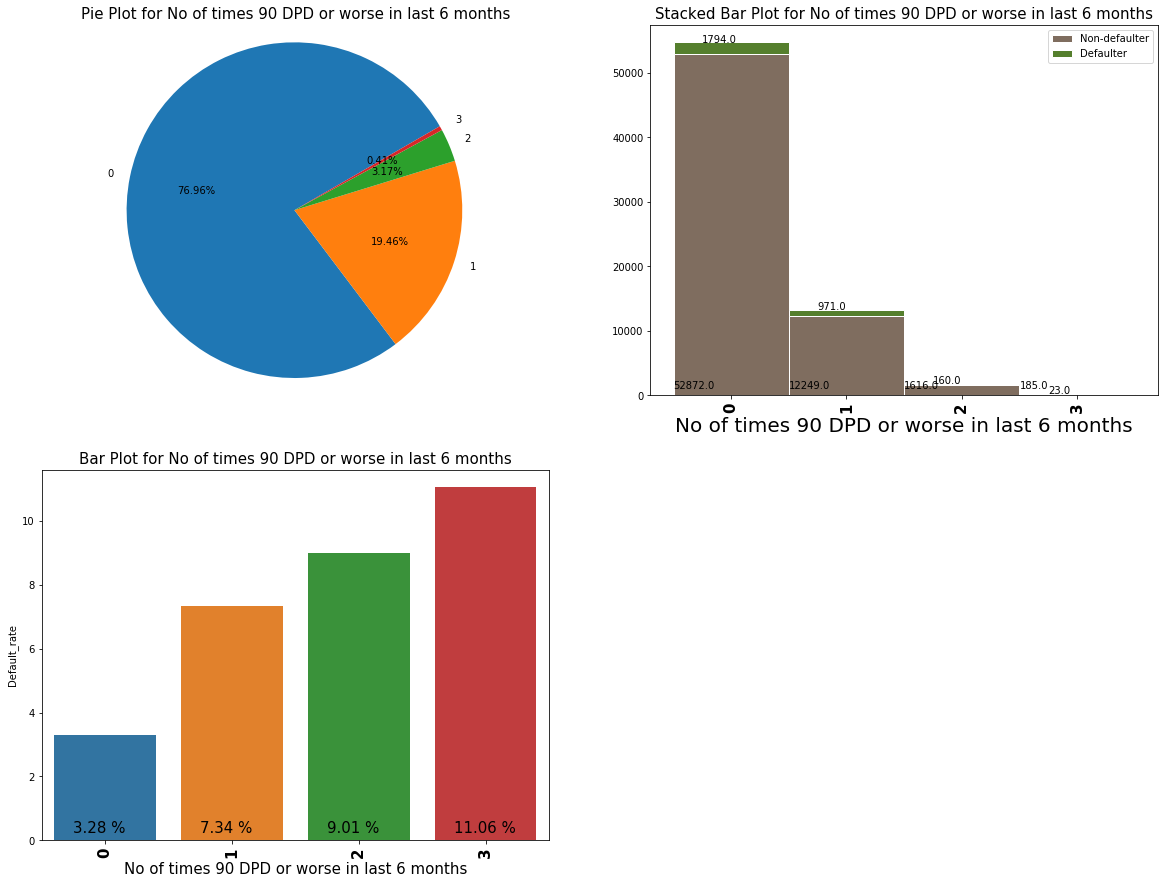

,No of times 90 DPD or worse in last 6 months,count_prospects,No_of_prospects,No_non_prospects,Default_rate
0,0,1794.0,54666,52872.0,3.28
1,1,971.0,13220,12249.0,7.34
2,2,160.0,1776,1616.0,9.01
3,3,23.0,208,185.0,11.06


In [76]:
## univariate analysis for No_90_DPD_last_6_months
plot_categorical_features(credit_dt,'No of times 90 DPD or worse in last 6 months')

In [77]:
credit_dt['No of times 60 DPD or worse in last 6 months'].value_counts()

0    51923
1    11395
2     5412
3     1876
4      597
5       92
Name: No of times 60 DPD or worse in last 6 months, dtype: int64

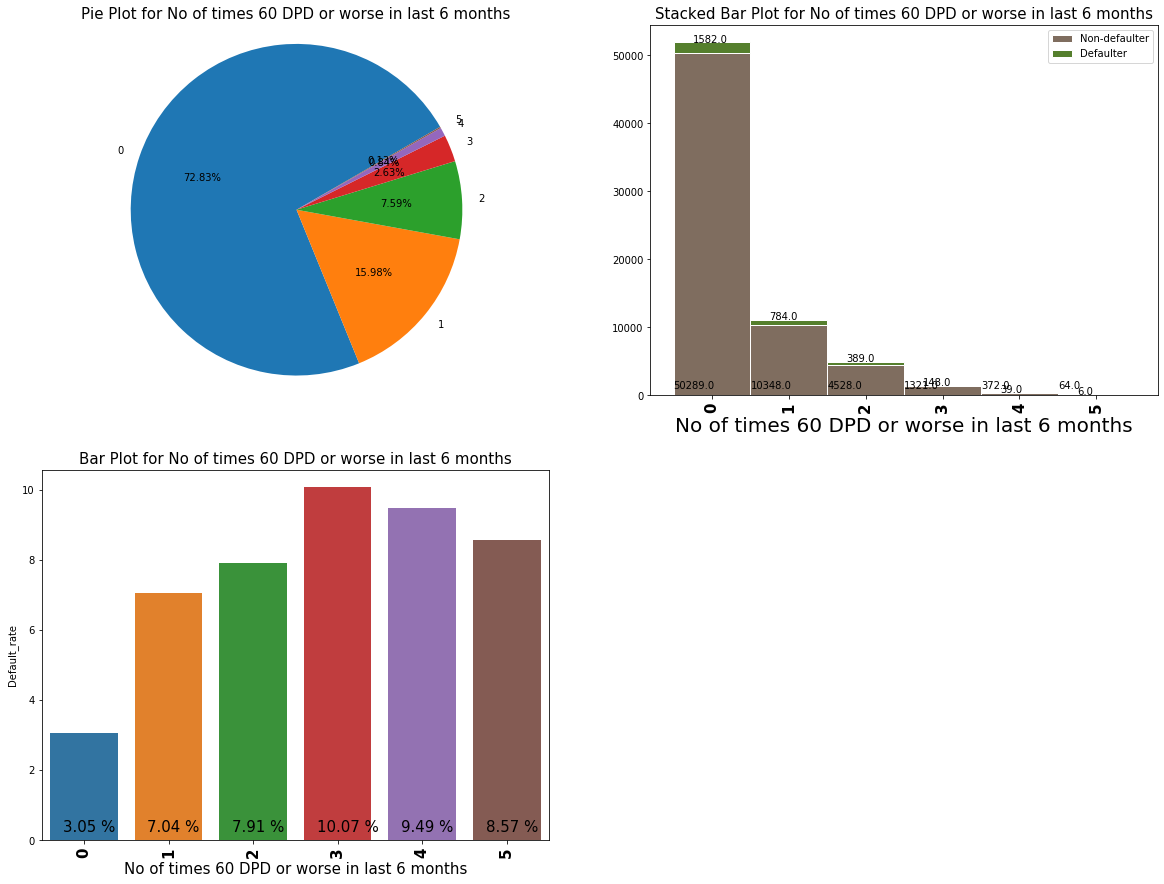

,No of times 60 DPD or worse in last 6 months,count_prospects,No_of_prospects,No_non_prospects,Default_rate
0,0,1582.0,51871,50289.0,3.05
1,1,784.0,11132,10348.0,7.04
2,2,389.0,4917,4528.0,7.91
3,3,148.0,1469,1321.0,10.07
4,4,39.0,411,372.0,9.49
5,5,6.0,70,64.0,8.57


In [78]:
## univariate analysis for No of times 60 DPD or worse in last 6 months
plot_categorical_features(credit_dt,'No of times 60 DPD or worse in last 6 months')

The univariate analysis indicates the increase in the defalters percentage as values for No_60_DPD_last_6_months increase from 0 to 3 and then it decreases steadily for values 4 and 5.

In [79]:
credit_dt['No of times 30 DPD or worse in last 6 months'].value_counts()

0    50109
1     9610
2     6195
3     3269
4     1389
5      565
6      142
7       16
Name: No of times 30 DPD or worse in last 6 months, dtype: int64

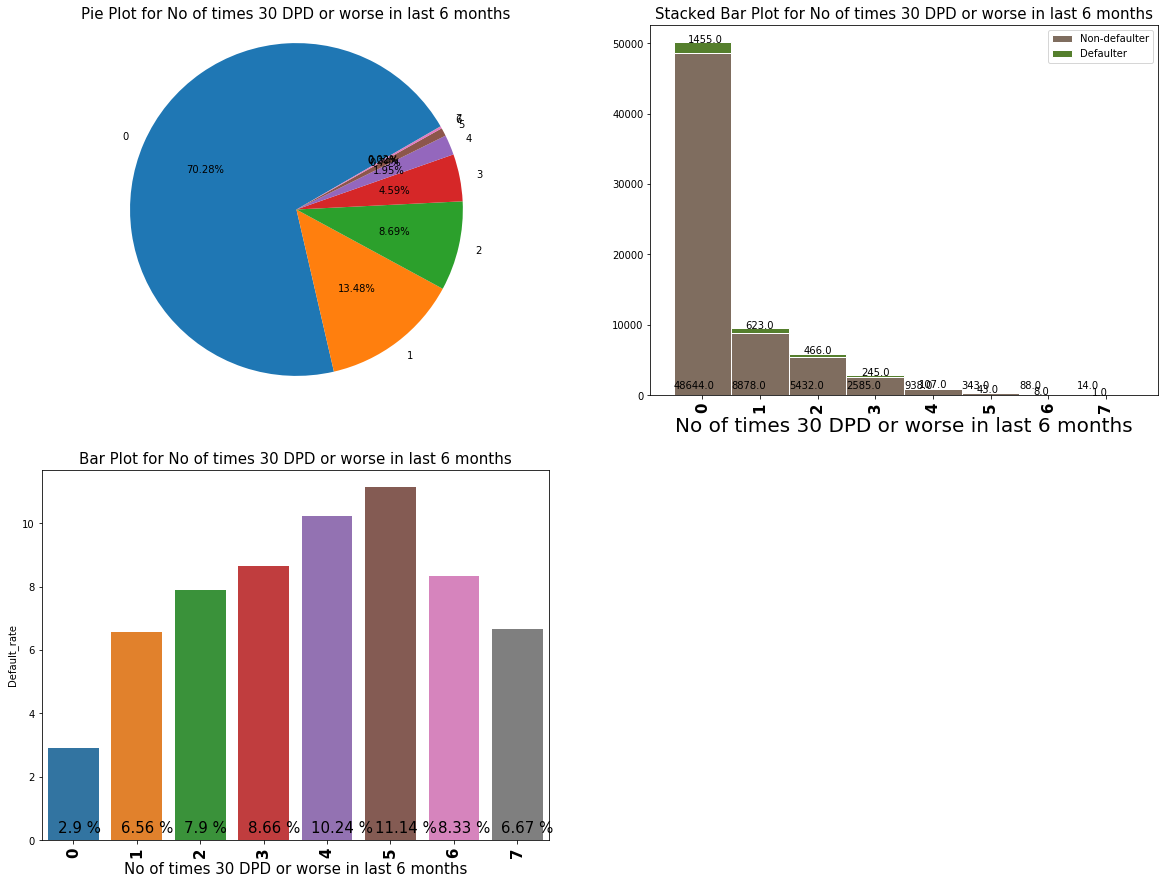

,No of times 30 DPD or worse in last 6 months,count_prospects,No_of_prospects,No_non_prospects,Default_rate
0,0,1455.0,50099,48644.0,2.90
1,1,623.0,9501,8878.0,6.56
2,2,466.0,5898,5432.0,7.90
3,3,245.0,2830,2585.0,8.66
4,4,107.0,1045,938.0,10.24
5,5,43.0,386,343.0,11.14
6,6,8.0,96,88.0,8.33
7,7,1.0,15,14.0,6.67


In [80]:
## univariate analysis for No of times 60 DPD or worse in last 6 months
plot_categorical_features(credit_dt,'No of times 30 DPD or worse in last 6 months')

The univariate analysis indicates the increase in the defalters percentage as values for No_30_DPD_last_6_months increase from 0 to 5 and then it decreases steadily for values 6 and 7.

In [81]:
## EDA Avgas CC Utilization in last 12 monthsvariable
credit_dt['Avgas CC Utilization in last 12 months'].describe()

count    70237.000000
mean        29.696926
std         29.533308
min          0.000000
25%          8.000000
50%         15.000000
75%         46.000000
max        113.000000
Name: Avgas CC Utilization in last 12 months, dtype: float64

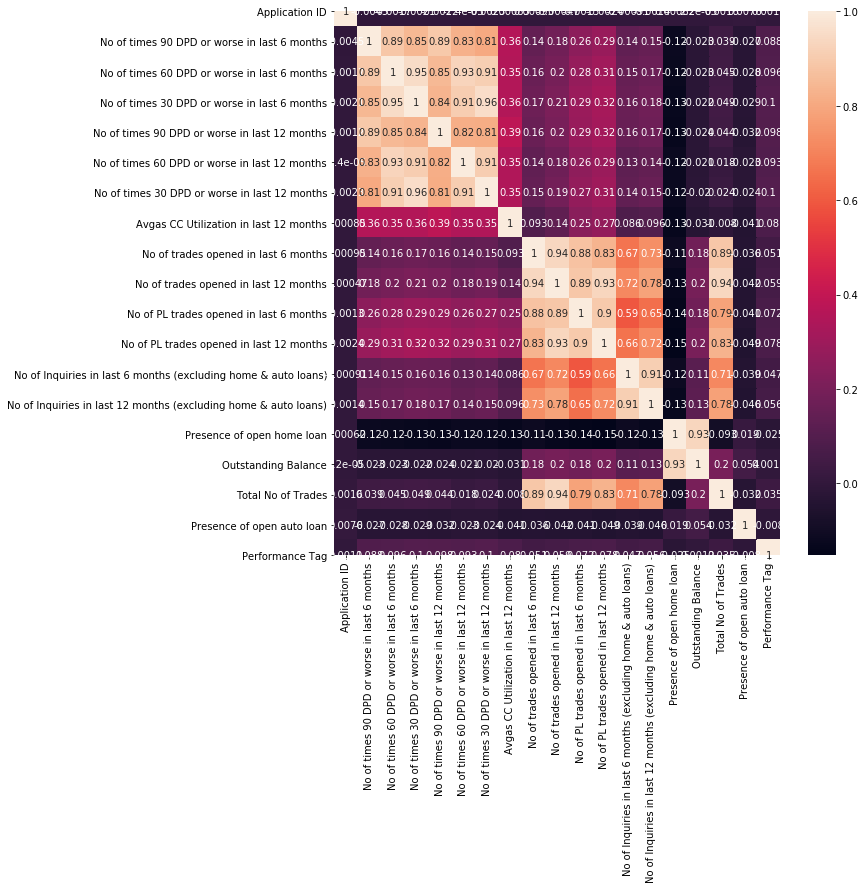

In [82]:
## lets draw heatmap
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(credit_dt.corr(),annot = True)
plt.show()

In [83]:
Demo=Demo_dt
Demo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 13 columns):
Application ID                                 69870 non-null int64
Age                                            69870 non-null float64
Gender                                         69868 non-null object
Marital Status (at the time of application)    69864 non-null object
No of dependents                               69867 non-null float64
Income                                         69870 non-null float64
Education                                      69752 non-null object
Profession                                     69857 non-null object
Type of residence                              69862 non-null object
No of months in current residence              69870 non-null int64
No of months in current company                69870 non-null int64
Performance Tag                                69870 non-null float64
age_bins                                       69870 non-null 

In [84]:

from sklearn.model_selection import train_test_split
X=Demo.drop(['Application ID','Performance Tag'],axis=1)
y=Demo.pop('Performance Tag')

In [85]:
!pip install xverse

In [86]:
#We will be using Weight of Evidence concept for transforming dataset and imputing null values
from xverse.transformer import WOE,MonotonicBinning


In [87]:
#Since all null values are present in categorical variables we are using 'mode' for imputation
clf=WOE(monotonic_binning=True,treat_missing='mode')
demo_X = clf.fit(X,y)

In [192]:
Woe_dout=demo_X.transform(X)

In [193]:
Woe_dout.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,age_bins
0,-0.010551,0.031865,-0.004037,-0.020996,-0.252931,0.017005,-0.028744,-0.004348,0.082834,-0.114699,-0.010551
1,0.034887,-0.010047,-0.004037,0.020030,-0.252931,-0.018216,-0.013607,-0.004348,0.082834,-0.114699,0.054768
2,0.034887,-0.010047,0.023017,-0.020996,-0.252931,0.017005,-0.013607,-0.004348,0.082834,-0.114699,0.054768
3,-0.010551,-0.010047,-0.004037,-0.020996,-0.252931,0.017005,0.092598,-0.004348,0.082834,-0.114699,-0.010551
4,0.034887,0.031865,-0.004037,0.006068,-0.252931,-0.018216,-0.028744,-0.004348,0.082834,-0.061385,0.054768


In [194]:
#Dividing our data set into train and test data ,after transformation of all values to their respective WOE
X_train, X_test, y_train, y_test = train_test_split(Woe_dout,y, train_size=0.7,test_size=0.3,random_state=100)

In [195]:
demo_X.woe_df

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,Age,"(18.999, 40.0]",24550,1071.0,23479.0,0.043625,0.956375,0.363297,0.350841,0.034887,0.000728
1,Age,"(40.0, 50.0]",22960,959.0,22001.0,0.041768,0.958232,0.325305,0.328756,-0.010551,0.000728
2,Age,"(50.0, 65.0]",22360,918.0,21442.0,0.041055,0.958945,0.311398,0.320403,-0.028509,0.000728
3,Education,Bachelor,17302,742.0,16560.0,0.042885,0.957115,0.251696,0.247452,0.017005,0.000764
4,Education,Masters,23481,998.0,22483.0,0.042502,0.957498,0.338535,0.335958,0.007639,0.000764
5,Education,Others,119,8.0,111.0,0.067227,0.932773,0.002714,0.001659,0.492312,0.000764
6,Education,Phd,4464,184.0,4280.0,0.041219,0.958781,0.062415,0.063955,-0.024372,0.000764
7,Education,Professional,24504,1016.0,23488.0,0.041463,0.958537,0.344640,0.350976,-0.018216,0.000764
8,Gender,F,16506,718.0,15788.0,0.043499,0.956501,0.243555,0.235916,0.031865,0.000320
9,Gender,M,53364,2230.0,51134.0,0.041788,0.958212,0.756445,0.764084,-0.010047,0.000320


In [196]:
demo_X.iv_df

,Variable_Name,Information_Value
3,Income,0.032126
6,No of months in current company,0.014065
7,No of months in current residence,0.003564
8,Profession,0.002289
10,age_bins,0.001210
9,Type of residence,0.000918
1,Education,0.000764
0,Age,0.000728
5,No of dependents,0.000356
2,Gender,0.000320


In [197]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [198]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:

# check score on train data
logreg.score(X_train, y_train)

0.9576151628534626

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [201]:
# predict churn on test data
y_pred = logreg.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[20086     0]
 [  875     0]]
Sensitivity: 	0.0
Specificity: 	1.0
AUC:    	 0.57


In [202]:

param={'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,2],'penalty':['l1','l2'],'class_weight':['balanced']}
logistic=LogisticRegression()
model=GridSearchCV(estimator=logistic,cv=5,param_grid=param,scoring='recall')
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [203]:
# fit model
model.best_score_

0.5643910009308055

In [204]:
y_predict=model.predict(X_test)

In [205]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.53      0.69     20086
         1.0       0.05      0.56      0.09       875

    accuracy                           0.54     20961
   macro avg       0.51      0.55      0.39     20961
weighted avg       0.93      0.54      0.66     20961

[[10730  9356]
 [  381   494]]
0.5354706359429416


In [206]:
# Create the parameter grid 
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"],'class_weight':['balanced']
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
model1=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.8s finished


In [207]:
model1.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [208]:
model1.best_score_

0.5649471467419085

In [209]:
y_predict1=model1.predict(X_test)

In [210]:
print(classification_report(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(accuracy_score(y_test,y_predict1))

              precision    recall  f1-score   support

         0.0       0.96      0.58      0.72     20086
         1.0       0.04      0.43      0.08       875

    accuracy                           0.57     20961
   macro avg       0.50      0.50      0.40     20961
weighted avg       0.92      0.57      0.69     20961

[[11595  8491]
 [  497   378]]
0.5712036639473308


In [ ]:
#random forest model
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier


# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,6,7],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,500],'class_weight':['balanced']}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv = 5,verbose = 1)
model2=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
model2.best_params_

In [ ]:
model2.best_score_

In [ ]:
y_predict2=model2.predict(X_test)

In [ ]:
print(classification_report(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(accuracy_score(y_test,y_predict2))

### EDA on Master data - 

In [88]:
Master_dt = Master_dt[pd.notnull(Master_dt['Avgas CC Utilization in last 12 months'])]
Master_dt.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                                0
No of trades opened in last 6 months                                  0
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [89]:
Master_dt = Master_dt[pd.notnull(Master_dt['Performance Tag_x'])]
Master_dt.isnull().sum()                    

Application ID                                                       0
No of times 90 DPD or worse in last 6 months                         0
No of times 60 DPD or worse in last 6 months                         0
No of times 30 DPD or worse in last 6 months                         0
No of times 90 DPD or worse in last 12 months                        0
No of times 60 DPD or worse in last 12 months                        0
No of times 30 DPD or worse in last 12 months                        0
Avgas CC Utilization in last 12 months                               0
No of trades opened in last 6 months                                 0
No of trades opened in last 12 months                                0
No of PL trades opened in last 6 months                              0
No of PL trades opened in last 12 months                             0
No of Inquiries in last 6 months (excluding home & auto loans)       0
No of Inquiries in last 12 months (excluding home & auto loans)      0
Presen

Here we can see that while we have removed null values from Performance Tag_x, null values of Performance Tag_y is also removed 

In [90]:
Master_dt.describe(percentiles=[0.10,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99])

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,...,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_x,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag_y
count,6.885300e+04,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,...,6.885300e+04,68853.000000,68853.000000,68853.000000,68853.00000,68850.000000,68853.000000,68853.000000,68853.000000,68853.000000
mean,4.992832e+08,0.252102,0.396352,0.529694,0.419880,0.609545,0.741536,29.266858,2.317532,5.866556,...,1.266234e+06,8.292231,0.086140,0.042133,45.00838,2.858954,27.387797,34.645389,34.248704,0.042133
std,2.886404e+08,0.507825,0.774581,1.003889,0.765981,1.024826,1.246796,29.517220,2.078734,5.084535,...,1.286511e+06,7.137342,0.280573,0.200895,9.92946,1.385301,15.467443,36.836357,20.351879,0.200895
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.000000,0.000000,0.000000,-3.00000,1.000000,-0.500000,6.000000,3.000000,0.000000
10%,9.940893e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,...,7.792200e+03,2.000000,0.000000,0.000000,31.00000,1.000000,6.000000,6.000000,6.000000,0.000000
25%,2.485472e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,...,2.134760e+05,3.000000,0.000000,0.000000,38.00000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980015e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,...,7.779120e+05,6.000000,0.000000,0.000000,45.00000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.502683e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,...,2.930224e+06,10.000000,0.000000,0.000000,53.00000,4.000000,40.000000,61.000000,51.000000,0.000000
80%,7.991449e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,4.000000,10.000000,...,2.962088e+06,11.000000,0.000000,0.000000,54.00000,4.000000,42.000000,73.000000,54.000000,0.000000
85%,8.486214e+08,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,61.000000,4.000000,11.000000,...,2.991564e+06,14.000000,0.000000,0.000000,56.00000,5.000000,45.000000,85.000000,58.000000,0.000000


In [91]:
#Based on Observation we can see that ,we have got negative value for Age and Income of customer , which is not valid for these variables ,
#because age and income cannot be negative
#We have to impute all negative values of Income with Zero or average income of Dataset and Age with average age

In [92]:
Master_dt.Age.describe()

count    68853.00000
mean        45.00838
std          9.92946
min         -3.00000
25%         38.00000
50%         45.00000
75%         53.00000
max         65.00000
Name: Age, dtype: float64

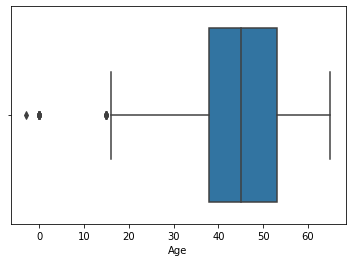

In [93]:
sns.boxplot(x='Age', data=Master_dt)
plt.show()

In [94]:
Master_dt['Age'][Master_dt['Age']<=18]=Master_dt['Age'].mean()

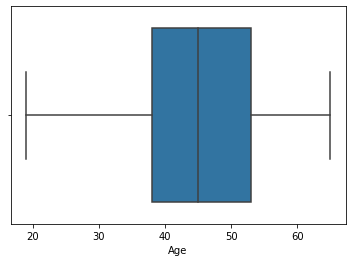

In [95]:
sns.boxplot(x='Age', data=Master_dt)
plt.show()

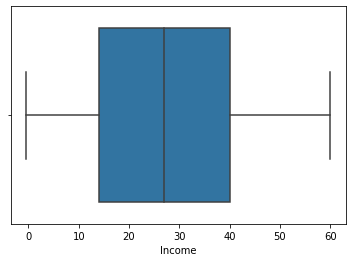

In [96]:
sns.boxplot(x='Income', data=Master_dt)
plt.show()

In [97]:
Master_dt['Income'][Master_dt['Income']<0].count()

79

In [98]:
Master_dt['Income'][Master_dt['Income']<0]=Master_dt['Income'].mean()

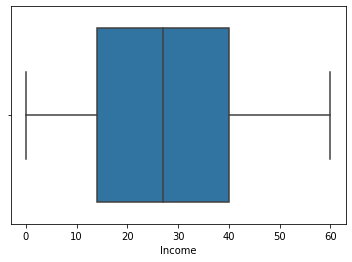

In [99]:
sns.boxplot(x='Income', data=Master_dt)
plt.show()

In [100]:
Master_dt.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,...,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_x,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag_y
count,6.885300e+04,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,...,6.885300e+04,68853.000000,68853.000000,68853.000000,68853.000000,68850.000000,68853.000000,68853.000000,68853.000000,68853.000000
mean,4.992832e+08,0.252102,0.396352,0.529694,0.419880,0.609545,0.741536,29.266858,2.317532,5.866556,...,1.266234e+06,8.292231,0.086140,0.042133,45.047256,2.858954,27.419795,34.645389,34.248704,0.042133
std,2.886404e+08,0.507825,0.774581,1.003889,0.765981,1.024826,1.246796,29.517220,2.078734,5.084535,...,1.286511e+06,7.137342,0.280573,0.200895,9.862755,1.385301,15.438536,36.836357,20.351879,0.200895
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.000000,0.000000,0.000000,19.000000,1.000000,0.000000,6.000000,3.000000,0.000000
25%,2.485472e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,...,2.134760e+05,3.000000,0.000000,0.000000,38.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980015e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,...,7.779120e+05,6.000000,0.000000,0.000000,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.502683e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,...,2.930224e+06,10.000000,0.000000,0.000000,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,...,5.218801e+06,44.000000,1.000000,1.000000,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [101]:
Master_dt=Master_dt.drop('Performance Tag_x',axis=1)

In [102]:
Master_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68853 entries, 0 to 71300
Data columns (total 29 columns):
Application ID                                                     68853 non-null int64
No of times 90 DPD or worse in last 6 months                       68853 non-null int64
No of times 60 DPD or worse in last 6 months                       68853 non-null int64
No of times 30 DPD or worse in last 6 months                       68853 non-null int64
No of times 90 DPD or worse in last 12 months                      68853 non-null int64
No of times 60 DPD or worse in last 12 months                      68853 non-null int64
No of times 30 DPD or worse in last 12 months                      68853 non-null int64
Avgas CC Utilization in last 12 months                             68853 non-null float64
No of trades opened in last 6 months                               68853 non-null float64
No of trades opened in last 12 months                              68853 non-null int64
No of P

In [103]:
#Creating Copy of Master_dt to make model upon
Master_dt2=Master_dt
Master_dt3=Master_dt

In [104]:
#Dependent variable provided to us provide information regarding default prospect,we can transfor this into Acquisition prospect by mapping 1 to 0 and 0 to 1 
Master_dt2['Performance Tag_y']=Master_dt2['Performance Tag_y'].map({1:0,0:1})

In [105]:
from sklearn.model_selection import train_test_split
X=Master_dt2.drop(['Application ID','Performance Tag_y'],axis=1)
y=Master_dt2.pop('Performance Tag_y')

In [106]:
clf=WOE(monotonic_binning=True,treat_missing='mode')
#clf=WOE(treat_missing='mode')
out_X = clf.fit(X,y)


In [107]:
Woe_out=out_X.transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(Woe_out,y, train_size=0.7,test_size=0.3,random_state=100)

In [109]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [110]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
Woe_out.isnull().sum()

No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of times 30 DPD or worse in last 12 months                      0
Avgas CC Utilization in last 12 months                             0
No of trades opened in last 6 months                               0
No of trades opened in last 12 months                              0
No of PL trades opened in last 6 months                            0
No of PL trades opened in last 12 months                           0
No of Inquiries in last 6 months (excluding home & auto loans)     0
No of Inquiries in last 12 months (excluding home & auto loans)    0
Presence of open home loan                                         0
Outstanding Balance               

In [112]:
out_X.woe_df

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,Age,"(18.999, 40.0]",24177,23119,1058,0.956239,0.043761,0.350543,0.364702,-0.039597,0.000900
1,Age,"(40.0, 50.0]",22622,21683,939,0.958492,0.041508,0.328769,0.323681,0.015597,0.000900
2,Age,"(50.0, 65.0]",22054,21150,904,0.959010,0.040990,0.320688,0.311617,0.028694,0.000900
3,Avgas CC Utilization in last 12 months,"(-0.001, 10.0]",24563,24086,477,0.980581,0.019419,0.365205,0.164426,0.797998,0.273648
4,Avgas CC Utilization in last 12 months,"(10.0, 32.0]",21408,20554,854,0.960108,0.039892,0.311651,0.294381,0.057008,0.273648
...,...,...,...,...,...,...,...,...,...,...,...
68,Type of residence,Company provided,1585,1513,72,0.954574,0.045426,0.022941,0.024819,-0.078688,0.000896
69,Type of residence,Living with Parents,1752,1673,79,0.954909,0.045091,0.025367,0.027232,-0.070946,0.000896
70,Type of residence,Others,196,191,5,0.974490,0.025510,0.002896,0.001724,0.518964,0.000896
71,Type of residence,Owned,13809,13229,580,0.957998,0.042002,0.200585,0.199931,0.003267,0.000896


In [113]:
#based on Information Value we can find variables which are significant to model making
out_X.iv_df


,Variable_Name,Information_Value
1,Avgas CC Utilization in last 12 months,0.273648
19,No of trades opened in last 12 months,0.272110
6,No of Inquiries in last 12 months (excluding h...,0.241736
25,Total No of Trades,0.197159
13,No of times 30 DPD or worse in last 12 months,0.191048
20,No of trades opened in last 6 months,0.176463
18,No of times 90 DPD or worse in last 6 months,0.166258
14,No of times 30 DPD or worse in last 6 months,0.146904
15,No of times 60 DPD or worse in last 12 months,0.139919
21,Outstanding Balance,0.126118


#Based on Information Value of variables , we are gonna be selecting those variables with feature 

Information Value	Variable Predictiveness
Less than 0.02	Not useful for prediction
0.02 to 0.1	Weak predictive Power
0.1 to 0.3	Medium predictive Power
0.3 to 0.5	Strong predictive Power
>0.5	Suspicious Predictive Power


In [114]:
#Variables with high predictive power
X_train_ft=X_train[['Avgas CC Utilization in last 12 months','No of trades opened in last 12 months','No of Inquiries in last 12 months (excluding home & auto loans)','Total No of Trades','No of times 30 DPD or worse in last 12 months','No of trades opened in last 6 months','No of times 90 DPD or worse in last 6 months','No of times 30 DPD or worse in last 6 months','No of times 60 DPD or worse in last 12 months','Outstanding Balance']]
X_test_ft=X_test[['Avgas CC Utilization in last 12 months','No of trades opened in last 12 months','No of Inquiries in last 12 months (excluding home & auto loans)','Total No of Trades','No of times 30 DPD or worse in last 12 months','No of trades opened in last 6 months','No of times 90 DPD or worse in last 6 months','No of times 30 DPD or worse in last 6 months','No of times 60 DPD or worse in last 12 months','Outstanding Balance']]

In [115]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [116]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train_ft, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:

# check score on train data
logreg.score(X_train_ft, y_train)

0.9573417432620288

In [120]:
# predict churn on test data
y_pred = logreg.predict(X_test_ft)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = logreg.predict_proba(X_test_ft)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[    0   845]
 [    0 19811]]
Sensitivity: 	1.0
Specificity: 	0.0
AUC:    	 0.66


In [121]:
#Model based on Hyperparameter tuning
param={'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,2],'penalty':['l1','l2'],'class_weight':['balanced']}
logistic=LogisticRegression()
model=GridSearchCV(estimator=logistic,cv=5,param_grid=param,scoring='recall')
model.fit(X_train_ft,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [122]:
# fit model
model.best_score_

0.5316962165255925

In [123]:
model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [124]:
y_predict=model.predict(X_test_ft)

In [125]:
# check area under curve
y_pred_prob = model.predict_proba(X_test_ft)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.66


In [126]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.06      0.70      0.11       845
           1       0.98      0.54      0.69     19811

    accuracy                           0.54     20656
   macro avg       0.52      0.62      0.40     20656
weighted avg       0.94      0.54      0.67     20656

[[  591   254]
 [ 9206 10605]]
0.5420216886134779


In [127]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_predict, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.54
Specificity: 	0.7


In [128]:
# Create the parameter grid 
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"],'class_weight':['balanced']
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
model1=grid_search.fit(X_train_ft,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.9s finished


In [129]:
# fit model
model1.best_score_

0.623129420202075

In [130]:
model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [131]:
y_predict1=model1.predict(X_test_ft)

In [132]:
print(classification_report(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(accuracy_score(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.07      0.61      0.12       845
           1       0.97      0.63      0.76     19811

    accuracy                           0.63     20656
   macro avg       0.52      0.62      0.44     20656
weighted avg       0.94      0.63      0.74     20656

[[  513   332]
 [ 7377 12434]]
0.626791247095275


In [133]:
# check area under curve
y_pred_prob1 = model1.predict_proba(X_test_ft)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.66


In [134]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_predict1, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.63
Specificity: 	0.61


In [ ]:
#random forest model
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier


# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,5,6],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [200,300],'class_weight':['balanced']}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv = 5,verbose = 1)
model2=grid_search.fit(X_train_ft,y_train)

In [ ]:
# fit model
model2.best_score_

In [ ]:
model2.best_params_

In [ ]:
y_predict2=model2.predict(X_test_ft)

In [ ]:
print(classification_report(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(accuracy_score(y_test,y_predict2))

In [ ]:
# check area under curve
y_pred_prob2 = model2.predict_proba(X_test_ft)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

In [ ]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_predict2, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

In [135]:
#Now making Reports of result,actual prediction,model prediction

In [136]:
y_test=pd.DataFrame(y_test)

In [137]:
y_test.reset_index(level=0, inplace=True)

In [138]:
y_test=y_test.rename(columns={'index':'IndexID'})

In [139]:
y_test

,IndexID,Performance Tag_y
0,39275,1
1,4573,1
2,5300,1
3,63068,1
4,66547,0
...,...,...
20651,48914,1
20652,30793,1
20653,38554,1
20654,52446,1


In [140]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob1), columns = ['pred_prob'])

In [141]:
decile_df = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)

In [142]:
decile_df.drop(0, inplace=True, axis = 1)

In [143]:
decile_df.rename({1:'IndexID', 2:'actual',3:'pred_prob'}, axis=1, inplace=True)

In [144]:
decile_df

,IndexID,actual,pred_prob
0,39275,1,0.526958
1,4573,1,0.777569
2,5300,1,0.819658
3,63068,1,0.332449
4,66547,0,0.698529
...,...,...,...
20651,48914,1,0.417893
20652,30793,1,0.512453
20653,38554,1,0.512453
20654,52446,1,0.354229


In [145]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    decile_df[i]= decile_df.pred_prob.map(lambda x: 1 if x > i else 0)
decile_df.head()

,IndexID,actual,pred_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,39275,1,0.526958,1,1,1,1,1,1,0,0,0,0
1,4573,1,0.777569,1,1,1,1,1,1,1,1,0,0
2,5300,1,0.819658,1,1,1,1,1,1,1,1,1,0
3,63068,1,0.332449,1,1,1,1,0,0,0,0,0,0
4,66547,0,0.698529,1,1,1,1,1,1,1,0,0,0


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(decile_df.actual, decile_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.959092  1.000000  0.000000
0.1   0.1  0.959092  1.000000  0.000000
0.2   0.2  0.955848  0.996265  0.008284
0.3   0.3  0.907823  0.942557  0.093491
0.4   0.4  0.750678  0.765433  0.404734
0.5   0.5  0.626791  0.627631  0.607101
0.6   0.6  0.443939  0.429357  0.785799
0.7   0.7  0.353166  0.331634  0.857988
0.8   0.8  0.103844  0.066731  0.973964
0.9   0.9  0.059983  0.020140  0.994083


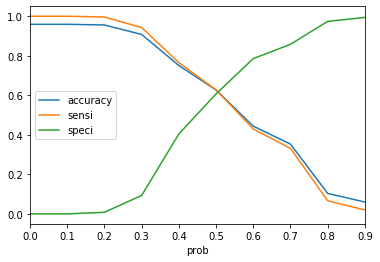

In [147]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [148]:
decile_df['final_predicted'] = decile_df.pred_prob.map( lambda x: 1 if x > 0.50 else 0)

decile_df.head()

,IndexID,actual,pred_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,39275,1,0.526958,1,1,1,1,1,1,0,0,0,0,1
1,4573,1,0.777569,1,1,1,1,1,1,1,1,0,0,1
2,5300,1,0.819658,1,1,1,1,1,1,1,1,1,0,1
3,63068,1,0.332449,1,1,1,1,0,0,0,0,0,0,0
4,66547,0,0.698529,1,1,1,1,1,1,1,0,0,0,1


In [149]:
report_dt=decile_df[['IndexID','actual','pred_prob','final_predicted']]

In [150]:
report_dt.head()

,IndexID,actual,pred_prob,final_predicted
0,39275,1,0.526958,1
1,4573,1,0.777569,1
2,5300,1,0.819658,1
3,63068,1,0.332449,0
4,66547,0,0.698529,1


In [151]:
report_dt.sort_values("pred_prob", axis = 0, ascending = False, 
                 inplace = True, na_position ='first') 

In [152]:
report_dt

,IndexID,actual,pred_prob,final_predicted
13224,2374,1,1.000000,1
20282,23481,1,1.000000,1
12896,6132,1,1.000000,1
14267,68141,1,1.000000,1
8913,3858,1,1.000000,1
...,...,...,...,...
13132,60415,1,0.163921,0
15966,60991,1,0.163921,0
14214,47304,1,0.163921,0
15883,64203,1,0.163921,0


In [153]:
#Generating decile of our final report dataframe
decile_df['decile'] = pd.qcut(decile_df['pred_prob'], 10, labels=np.arange(10, 0, -1))

In [154]:
lift_df = decile_df.groupby('decile')['pred_prob'].count().reset_index()

In [155]:
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)

In [156]:
lift_df_pred = decile_df[decile_df['actual']==1].groupby('decile')['actual'].count().reset_index()

In [157]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [158]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [159]:
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

In [160]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

In [161]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [162]:
lift_df_final

,decile,total,actual,cumresp,gain,cumlift
9,1,1517,1487,1487,7.505931,0.750593
8,2,1832,1808,3295,16.632174,0.831609
7,3,2604,2559,5854,29.549240,0.984975
6,4,2280,2214,8068,40.724850,1.018121
5,5,2032,1960,10028,50.618343,1.012367
4,6,505,487,10515,53.076574,0.884610
3,7,3478,3323,13838,69.850083,0.997858
2,8,2198,2061,15899,80.253395,1.003167
1,9,2140,1987,17886,90.283176,1.003146
0,10,2070,1925,19811,100.000000,1.000000


Since we have transformed our dependent variable for acquition analysis by changing column values,
we can see that by targeting only 40% of population we can achieve 80% of our acquition prospects,hence saving cost

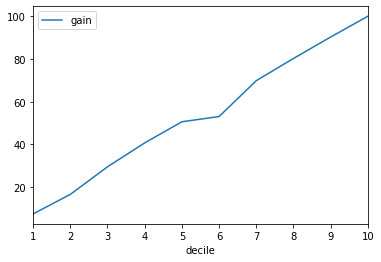

In [163]:
#Lift Chart
lift_df_final.plot.line(x='decile', y=['gain'])

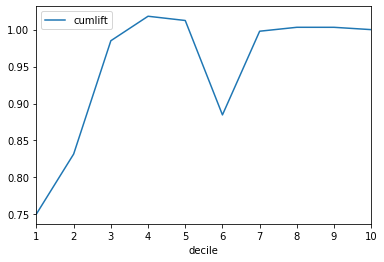

In [164]:
lift_df_final.plot.line(x='decile', y=['cumlift'])

__Application Score Card__
Application Scorecard
It is required to build an application scorecard with the good to bad odds. The ideal model that is suitable for such a case is Logistic Regression model with all variables(combined data of demographics and CreditBureau). Similar representation of non-defaulters to defaulters we also have in our WoE transformed representation. So, we’ll need both our logistic regression coefficients that we got from fitting our model (WoE Logistic Regression model combined data model with L1 regularization prepared earlier) as well as our WOE dataset with the transformed WOE values.

The scorecard in this case will be evaluated as :

target_score = 400

target_odds = 10

pts_double_odds = 20

factor = pts_double_odds / log10(2)

offset = target_score - factor X log10(target_odds)

Finally,

scorecard['score'] = offset - factor X scorecard['logit']

Note: The negative sign for the term of scorecard['logit'] is applied as model is evaluating probabilities ofodds of defaults (bad). However, we tend to provide a high score to the persons who are good. Therefore, the sign is negativ


In [167]:
# reading  WoE Master data file
Woe_out.head()

,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,...,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company
0,0.266313,0.122864,0.200744,0.13572,0.203926,0.273486,0.797998,0.565008,0.917572,0.100403,...,0.015597,-0.028448,0.003736,0.019779,0.253202,-0.020241,0.027559,0.002565,-0.080641,0.118382
1,0.266313,0.122864,0.200744,0.13572,0.203926,0.273486,0.797998,0.565008,0.917572,0.100403,...,-0.039597,0.008947,0.003736,-0.018111,0.253202,0.015387,0.013514,0.002565,-0.080641,0.118382
2,0.266313,0.122864,0.200744,0.13572,0.203926,0.273486,0.797998,0.565008,0.917572,0.100403,...,-0.039597,0.008947,-0.021273,0.019779,0.253202,-0.020241,0.013514,0.002565,-0.080641,0.118382
3,0.266313,0.122864,0.200744,0.13572,0.203926,0.273486,0.057008,0.565008,0.917572,0.100403,...,0.015597,0.008947,0.003736,0.019779,0.253202,-0.020241,-0.089453,0.002565,-0.080641,0.118382
4,0.266313,0.122864,0.200744,0.13572,0.203926,0.273486,0.057008,0.565008,0.917572,0.100403,...,-0.039597,-0.028448,0.003736,-0.007582,0.253202,0.015387,0.027559,0.002565,-0.080641,0.061751


In [169]:
#We will be using logistic regression model forapplication score card formulation,base on best parameters which we got in above models
model_score=LogisticRegression(C=0.1,penalty="l2",class_weight='balanced')
model_score.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
## checking the coefficient
model_score.coef_[0]

array([ 0.17829747, -0.14586305,  0.0223345 ,  0.05930365,  0.13970682,
        0.33174548,  0.46159756, -0.02126882,  0.44274588,  0.0247176 ,
       -0.02817713,  0.01781612,  0.36681249,  0.07552073,  0.04784281,
       -0.09284248, -0.25006714,  0.21856769, -0.0299483 , -0.02074378,
        0.49333983,  0.12056586,  0.54778839,  0.3861669 ,  0.38598163,
       -0.80216086,  0.38024361])

In [171]:
# checking the intercept
intercept = model_score.intercept_[0]
intercept

0.00987255821537031

In [172]:
## combining coefficients with their respective variable names
lr_woe_mod = pd.DataFrame({'cols':X_train.columns,'coeff':model_score.coef_[0]})
lr_woe_mod_index = lr_woe_mod.set_index('cols')
lr_woe_mod_index

,coeff
cols,
No of times 90 DPD or worse in last 6 months,0.178297
No of times 60 DPD or worse in last 6 months,-0.145863
No of times 30 DPD or worse in last 6 months,0.022334
No of times 90 DPD or worse in last 12 months,0.059304
No of times 60 DPD or worse in last 12 months,0.139707
No of times 30 DPD or worse in last 12 months,0.331745
Avgas CC Utilization in last 12 months,0.461598
No of trades opened in last 6 months,-0.021269
No of trades opened in last 12 months,0.442746


In [173]:
## Multiply linear regression coefficients to observation WOE Values
scorecard = Woe_out[lr_woe_mod_index.index].apply(lambda x: x*lr_woe_mod_index['coeff'] ,axis=1)
scorecard.head()

,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,...,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company
0,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.368354,-0.012017,0.406251,0.002482,...,0.003409,0.000852,-0.000078,0.009758,0.030528,-0.011088,0.010642,0.00099,0.064687,0.045014
1,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.368354,-0.012017,0.406251,0.002482,...,-0.008655,-0.000268,-0.000078,-0.008935,0.030528,0.008429,0.005219,0.00099,0.064687,0.045014
2,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.368354,-0.012017,0.406251,0.002482,...,-0.008655,-0.000268,0.000441,0.009758,0.030528,-0.011088,0.005219,0.00099,0.064687,0.045014
3,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.026315,-0.012017,0.406251,0.002482,...,0.003409,-0.000268,-0.000078,0.009758,0.030528,-0.011088,-0.034544,0.00099,0.064687,0.045014
4,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.026315,-0.012017,0.406251,0.002482,...,-0.008655,0.000852,-0.000078,-0.003741,0.030528,0.008429,0.010642,0.00099,0.064687,0.023480


In [174]:
## Get Logit Values 
scorecard['logit'] = scorecard.sum(axis=1) + intercept
scorecard.head()

,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,...,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,logit
0,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.368354,-0.012017,0.406251,0.002482,...,0.000852,-0.000078,0.009758,0.030528,-0.011088,0.010642,0.00099,0.064687,0.045014,1.369061
1,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.368354,-0.012017,0.406251,0.002482,...,-0.000268,-0.000078,-0.008935,0.030528,0.008429,0.005219,0.00099,0.064687,0.045014,1.434811
2,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.368354,-0.012017,0.406251,0.002482,...,-0.000268,0.000441,0.009758,0.030528,-0.011088,0.005219,0.00099,0.064687,0.045014,1.350972
3,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.026315,-0.012017,0.406251,0.002482,...,-0.000268,-0.000078,0.009758,0.030528,-0.011088,-0.034544,0.00099,0.064687,0.045014,0.943336
4,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.026315,-0.012017,0.406251,0.002482,...,0.000852,-0.000078,-0.003741,0.030528,0.008429,0.010642,0.00099,0.064687,0.023480,0.999442


In [175]:
#Convert Logit to Odds Ratio
#Odds Ratio to Probability
scorecard['odds'] = np.exp(-scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [176]:
# Scoring Logic
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log10(2)
offset = target_score - factor * np.log10(target_odds)
print("factor =",factor)
print("offset =",offset)

factor = 66.43856189774725
offset = 333.56143810225274


In [177]:
## Get Logit Values
scorecard['score'] = offset - factor * scorecard['logit']
scorecard.head()

,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,...,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,logit,odds,probs,score
0,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.368354,-0.012017,0.406251,0.002482,...,0.030528,-0.011088,0.010642,0.00099,0.064687,0.045014,1.369061,0.254346,0.202772,242.603018
1,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.368354,-0.012017,0.406251,0.002482,...,0.030528,0.008429,0.005219,0.00099,0.064687,0.045014,1.434811,0.238160,0.192350,238.234687
2,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.368354,-0.012017,0.406251,0.002482,...,0.030528,-0.011088,0.005219,0.00099,0.064687,0.045014,1.350972,0.258988,0.205711,243.804786
3,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.026315,-0.012017,0.406251,0.002482,...,0.030528,-0.011088,-0.034544,0.00099,0.064687,0.045014,0.943336,0.389327,0.280227,270.887570
4,0.047483,-0.017921,0.004484,0.008049,0.02849,0.090728,0.026315,-0.012017,0.406251,0.002482,...,0.030528,0.008429,0.010642,0.00099,0.064687,0.023480,0.999442,0.368085,0.269051,267.159926


In [187]:
# Add Back Application ID and Performance_Tag
scorecard['App_Id'] = Master_dt['Application ID']


In [199]:
scorecard['Performance_Tag'] = Master_dt3['Performance Tag_y']
scorecard.head()

KeyError: 'Performance Tag_y'

In [200]:
## checking data across all with values in performance tag
print(scorecard.score.min())
print(scorecard.score.max())
print(scorecard.score.mean())
print(scorecard.score.median())

0        1
1        1
2        1
3        1
4        1
        ..
71285    1
71286    0
71287    0
71299    1
71300    1
Name: Performance Tag_y, Length: 68853, dtype: int64

In [ ]:
## checking data for the defaulters
print(scorecard[scorecard.Performance_Tag==1].score.min())
print(scorecard[scorecard.Performance_Tag==1].score.max())
print(scorecard[scorecard.Performance_Tag==1].score.mean())
print(scorecard[scorecard.Performance_Tag==1].score.median())

# Model to be selected for our modelling purpose in Decision Tree Model , Having Sensitivity of 63%, Specficity of 61% ,having high stability than Logistic regression and Random Forest  


# Benefits of ML model

- Our objective is to minimize “Credit Loss’’ from Profit & Loss perspective.
- With ML model ,we get good discriminatory power over pre-identifying risky costumers.
- Cost Reduction
- Reduces time since the process is automated.
- Scorecard and cut-off provides clear instructions as how to proceed with application.



# Financial Benefit of the ML Model

- The model giving a recall of 63% which means it is preventing 63% of losses.
	

- Saving the amount paid to Underwriters for Credit application approval is added advantage.

- **Important Note** : There will be a tradeoff between the increase in approval rate and credit loss – increase of one will lead to increase of other. With this model the approval rate is bound to be less business to the bank and so will be the profits of the bank. 